# Term Project $\,\, \tiny\text{Instructions & Template - revised Feb 18, 2019}$

<img src="banner project.jpg" align=left>

In [1]:
cat("<< Notebook apparatus is located here. Toggle cell input display to see code. >>")

options(warn=-1)

# Load some required functions
library(ggplot2,    verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(gridExtra,  verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE) 
library(GGally,     verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(reshape2,   verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(IRdisplay,  verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(base64enc,  verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(caret,     verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(e1071,     verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)

# Define some useful functions
size = function(data) data.frame(observations=dim(data)[1], variables=dim(data)[2])
move_column = function(d, n, p) { w = which(names(d) == n); x = setdiff(1:ncol(d), w); pre = if (p==1) c() else x[1:(p-1)]; post = if (p==length(d)) c() else x[p:length(x)]; d[, c(pre, w, post)] }
createFolds.train = function(v, train) { test = list(); for (i in 1:length(train)) { test[[i]] = setdiff(1:length(v), train[[i]]); names(test)[[i]]=sprintf("Fold%d",i) }; test }

# Set randomization seed
set.seed(12345)

# Set some visualization constants
restore = list(repr.plot.width=8, repr.plot.height=2)
PALETTE = c("#00A9FF", "#F8766D", "#7CAE00", "#C77CFF", "#CD9600", "#00BE67", "#FF61CC", "#00BFC4")
theme.no_legend = theme(legend.position="none")
theme.no_x_axis_labels = theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())

# Set some visualization formatting defaults
options(scipen=10)                         
options(repr.matrix.max.cols=2800)
options(repr.matrix.max.rows=1000)
options(restore)
update_geom_defaults("point", list(size=0.25, colour=PALETTE[1]))
update_geom_defaults("line", list(size=0.15))
update_geom_defaults("col", list(colour=NA, fill=PALETTE[1]))
theme_update(plot.title=element_text(size=10, hjust=0.5), plot.subtitle=element_text(size=8, face="italic", hjust=0.5), axis.title=element_text(size=7), axis.text=element_text(size=7), strip.text=element_text(size=7), strip.text.y=element_text(angle=90), legend.title=element_blank(), legend.text=element_text(size=7))

<< Notebook apparatus is located here. Toggle cell input display to see code. >>

In [2]:
cat("<< More notebook apparatus is located here. Toggle cell input display to see code. >>")

# Load some more required functions, if necessary

# Define some more useful functions, if necessary

# Set some more visualization constants, if necessary

# Set some more visualization formatting defaults, if necessary

<< More notebook apparatus is located here. Toggle cell input display to see code. >>

<br>

## Situation
___

Your objective is to create a method to recommend 6-month investments in 1,000 pubicly-traded companies.

Your approach will be to construct and evaluate a model based on 2016 fundamentals data for 5,000 reference companies, which will predict growth from end of 2016 quarter 4 to end of 2017 quarter 2 (i.e., 6-month look ahead).  Then apply your model to 2016 fundamentals data for your 1,000 companies, consider the results in accordance with a business value formula, and recommend investment levels.

At the end of this course, you will present your method to the class. Also, you will be provided 2016 fundamentals data on 1,000 new companies (not known to you in advance) - you will recommend investments in these companies and have the results of your recommendation validated on actual company performance.  

* **Role:** Investor. 
* **Business Decision:** Invest how much in which companies?
* **Approach:** Construct a model based on historical company fundamentals, and construct a business value formula, to inform your investment decisions.  
* **Dataset:**  Compustat (for select companies that reported quarterly measures including their stock prices for 1st, 2nd, 3rd, and 4th quarters in 2016 and 2nd quarter in 2017). (...)

<br>

## Guidance
___
A good project will include ... 

* Discussion:
  * Business value formula: description, including consideration of risk profile
  * Why did you prepare the data as you did?
  * What insights did you get from your data exploration?
  * What approach did you take in developing several candidate models?  
  * How did you select your model from among the several candidate models?
  * What approach did you take in tuning your model?
  

* R code & output, using this Jupyter notebook as a template:
  * Data exploration
  * Data preparation
  * Model construction using a variety of methods, including possibly naive bayes, support vector machine, multilayer perceptron, and/or others
  * Model tuning & selection
  * Model evaluation by cross-validation
  

* Reflection: 
  * What did you learn from the project?
  * What advice about model development do you have for others?

<br>

## Business Parameters
___


In [3]:
budget = 1000000

<br>

## Your Team
___
_List your team members here._

<br>

## Discussion
___
_Describe your approach to model construction, evaluation, and business value formula here. (250 to 1000+ words)_

<br>

## Training & Testing Data
___

**Data Dictionary**

In [4]:
dictionary = read.csv("Data Dictionary.csv")
size(dictionary)
dictionary

observations variables
1 674          4

Variable.Name Data.Type
1   ACCHGQ        NUM      
2   ACCHGY        NUM      
3   ACCTCHGQ      CHAR     
4   ACCTSTDQ      CHAR     
5   ACOMINCQ      NUM      
6   ACOQ          NUM      
7   ACTQ          NUM      
8   ADD1          CHAR     
9   ADD2          CHAR     
10  ADD3          CHAR     
11  ADD4          CHAR     
12  ADDZIP        CHAR     
13  ADJEX         NUM      
14  ADRRQ         NUM      
15  AFUDCCY       NUM      
16  AFUDCIY       NUM      
17  AJEXQ         NUM      
18  AJPQ          NUM      
19  ALTOQ         NUM      
20  AMCY          NUM      
21  ANCQ          NUM      
22  ANOQ          NUM      
23  AOCIDERGLQ    NUM      
24  AOCIOTHERQ    NUM      
25  AOCIPENQ      NUM      
26  AOCISECGLQ    NUM      
27  AOL2Q         NUM      
28  AOLOCHY       NUM      
29  AOQ           NUM      
30  APALCHY       NUM      
31  APDEDATEQ     DATE     
32  APQ           NUM      
33  AQAQ          NUM      
34  AQAY          NUM      
35  AQCY          NUM      
36  AQDQ          NUM      
37  AQDY          NUM      
38  AQEPSQ        NUM      
39  AQEPSY        NUM      
40  AQPL1Q        NUM      
41  AQPQ          NUM      
42  AQPY          NUM      
43  ARCEDQ        NUM      
44  ARCEDY        NUM      
45  ARCEEPSQ      NUM      
46  ARCEEPSY      NUM      
47  ARCEQ         NUM      
48  ARCEY         NUM      
49  ATQ           NUM      
50  AUL3Q         NUM      
51  BILLEXCEQ     NUM      
52  BSPRQ         CHAR     
53  BUSDESC       CHAR     
54  CAPR1Q        NUM      
55  CAPR2Q        NUM      
56  CAPR3Q        NUM      
57  CAPSFTQ       NUM      
58  CAPSQ         NUM      
59  CAPXY         NUM      
60  CDVCY         NUM      
61  CEIEXBILLQ    NUM      
62  CEQQ          NUM      
63  CHECHY        NUM      
64  CHEQ          NUM      
65  CHQ           NUM      
66  CIBEGNIQ      NUM      
67  CIBEGNIY      NUM      
68  CICURRQ       NUM      
69  CICURRY       NUM      
70  CIDERGLQ      NUM      
71  CIDERGLY      NUM      
72  CIK           CHAR     
73  CIMIIQ        NUM      
74  CIMIIY        NUM      
75  CIOTHERQ      NUM      
76  CIOTHERY      NUM      
77  CIPENQ        NUM      
78  CIPENY        NUM      
79  CIQ           NUM      
80  CISECGLQ      NUM      
81  CISECGLY      NUM      
82  CITOTALQ      NUM      
83  CITOTALY      NUM      
84  CITY          CHAR     
85  CIY           NUM      
86  COGSQ         NUM      
87  COGSY         NUM      
88  COMPSTQ       CHAR     
89  CONM          CHAR     
90  CONML         CHAR     
91  COUNTY        CHAR     
92  CSH12Q        NUM      
93  CSHFD12       NUM      
94  CSHFDQ        NUM      
95  CSHFDY        NUM      
96  CSHIQ         NUM      
97  CSHOPQ        NUM      
98  CSHOQ         NUM      
99  CSHPRQ        NUM      
100 CSHPRY        NUM      
101 CSHTRQ        NUM      
102 CSTKCVQ       NUM      
103 CSTKEQ        NUM      
104 CSTKEY        NUM      
105 CSTKQ         NUM      
106 CURNCDQ       CHAR     
107 CURRTRQ       NUM      
108 CURUSCNQ      NUM      
109 CUSIP         CHAR     
110 DATACQTR      CHAR     
111 DATAFQTR      CHAR     
112 DCOMQ         NUM      
113 DD1Q          NUM      
114 DEPCY         NUM      
115 DERACQ        NUM      
116 DERALTQ       NUM      
117 DERHEDGLQ     NUM      
118 DERHEDGLY     NUM      
119 DERLCQ        NUM      
120 DERLLTQ       NUM      
121 DILADQ        NUM      
122 DILADY        NUM      
123 DILAVQ        NUM      
124 DILAVY        NUM      
125 DLCCHY        NUM      
126 DLCQ          NUM      
127 DLDTE         DATE     
128 DLRSN         CHAR     
129 DLTISY        NUM      
130 DLTRY         NUM      
131 DLTTQ         NUM      
132 DOQ           NUM      
133 DOY           NUM      
134 DPACREQ       NUM      
135 DPACTQ        NUM      
136 DPCY          NUM      
137 DPQ           NUM      
138 DPRETQ        NUM      
139 DPRETY        NUM      
140 DPY           NUM      
141 DRCQ          NUM      
142 DRLTQ         NUM      


<br>

**Data for 2016, Quarters 1, 2, 3, 4**

In [5]:
data.2016.q1 = read.csv("Company Fundamentals 2016-Q1 A.csv", header=TRUE)
data.2016.q2 = read.csv("Company Fundamentals 2016-Q2 A.csv", header=TRUE)
data.2016.q3 = read.csv("Company Fundamentals 2016-Q3 A.csv", header=TRUE)
data.2016.q4 = read.csv("Company Fundamentals 2016-Q4 A.csv", header=TRUE)

size(data.2016.q1)
size(data.2016.q2)
size(data.2016.q3)
size(data.2016.q4)

head(data.2016.q1, 1)

observations variables
1 5000         680

observations variables
1 5000         680

observations variables
1 5000         680

observations variables
1 5000         680

gvkey datadate fyearq fqtr fyr indfmt consol popsrc datafmt tic cusip    
1 1004  20160229 2015   3    5   INDL   C      D      STD     AIR 000361105
  conm     acctchgq acctstdq adrrq ajexq ajpq bsprq compstq curcdq curncdq
1 AAR CORP NA       DS       NA    1     1    NA    AZ      USD    USD    
  currtrq curuscnq datacqtr datafqtr finalq ogmq rp scfq srcq staltq updq
1 1       NA       2016Q1   2015Q3   Y      NA   Q  7    5    NA     3   
  apdedateq fdateq   pdateq   rdq      acchgq acomincq acoq actq  altoq ancq 
1 20160229  20160324 20160322 20160322 0      -40.4    93.2 970.7 77.7  551.3
  anoq aociderglq aociotherq aocipenq aocisecglq aol2q aoq   apq aqaq aqdq
1 NA   0          0          -38.5    0          NA    247.9 162 NA   NA  
  aqepsq aqpl1q aqpq arcedq arceepsq arceq atq  aul3q billexceq capr1q capr2q
1 NA     NA     NA   NA     NA       NA    1522 NA    NA        NA     NA    
  capr3q capsftq capsq ceiexbillq ceqq  cheq chq  cibegniq cicurrq ciderglq
1 NA     NA      447.8 NA         858.3 50.4 50.4 4.8      -1.8    0       
  cimiiq ciotherq cipenq ciq cisecglq citotalq cogsq csh12q cshfd12 cshfdq
1 0      0        0.3    3.3 0        3.3      334.3 35.575 35.825  34.4  
  cshiq  cshopq cshoq  cshprq cstkcvq cstkeq cstkq dcomq dd1q deracq deraltq
1 45.051 0.312  34.748 34.2   1       -0.1   45.1  0     35.7 NA     NA     
  derhedglq derlcq derlltq diladq dilavq dlcq dlttq doq  dpacreq dpactq dpq 
1 NA        NA     NA      0      9.8    35.7 160   -5.1 NA      435.3  18.5
  dpretq drcq drltq dteaq dtedq dteepsq dtepq dvintfq dvpq epsf12 epsfi12
1 NA     NA   NA    0     0     0       0     NA      0    -1.36  1.39   
  epsfiq epsfxq epspi12 epspiq epspxq epsx12 esopctq esopnrq esoprq esoptq
1 0.14   0.29   1.41    0.14   0.29   -1.36  0       0       0      0     
  esubq fcaq ffoq finacoq finaoq finchq findlcq findltq finivstq finlcoq
1 NA    NA   NA   NA      NA     NA     NA      NA      NA       NA     
  finltoq finnpq finreccq finrecltq finrevq finxintq finxoprq gdwlamq gdwlia12
1 NA      NA     NA       NA        NA      NA       NA       NA      NA      
  gdwliaq gdwlid12 gdwlidq gdwlieps12 gdwliepsq gdwlipq gdwlq glaq glcea12
1 NA      NA       NA      NA         NA        NA      115.2 NA   NA     
  glceaq glced12 glcedq glceeps12 glceepsq glcepq gldq glepsq glivq glpq
1 NA     NA      NA     NA        NA       NA     NA   NA     NA    NA  
  hedgeglq ibadj12 ibadjq ibcomq ibmiiq ibq icaptq intaccq intanoq intanq
1 NA       -56.1   9.8    9.9    9.9    9.9 1018.3 NA      37.7    152.9 
  invfgq invoq invrmq invtq invwipq ivaeqq ivaoq ivltq ivstq lcoq lctq  lltq
1 NA     516.7 37.9   577.2 22.6    NA     NA    17.3  0     162  359.7 304 
  lnoq lol2q loq  loxdrq lqpl1q lseq ltmibq ltq   lul3q mibnq mibq mibtq miiq
1 NA   NA    64.2 64.2   NA     1522 663.7  663.7 NA    0     0    0     0   
  msaq ncoq niitq nimq niq nopiq npatq npq nrtxtdq nrtxtepsq nrtxtq obkq oepf12
1 0    NA   NA    NA   4.8 0.1   NA    0   0.07    0.07      2.5    NA   -0.63 
  oeps12 oepsxq oiadpq oibdpq opepsq optdrq optfvgrq optlifeq optrfrq optvolq
1 -0.62  0.21   16.2   34.7   0.21   NA     NA       NA       NA      NA     
  piq  pllq pnc12 pncd12 pncdq pnceps12 pncepsq pnciapq pnciaq pncidpq pncidq
1 14.6 NA   NA    NA     NA    NA       NA      0       NA     0       NA    
  pnciepspq pnciepsq pncippq pncipq pncpd12 pncpdq pncpeps12 pncpepsq pncpq
1 0         NA       0       NA     0       0      0         0        0.163
  pncq pncwiapq pncwiaq pncwidpq pncwidq pncwiepq pncwiepsq pncwippq pncwipq
1 NA   0.163    NA      0        NA      0        NA        0.25     NA     
  pnrshoq ppegtq ppentq prcaq prcd12 prcdq prce12 prceps12 prcepsq prcpd12
1 0       738.7  303.4  NA    NA     NA    NA     NA       NA      0      
  prcpdq prcpeps12 prcpepsq prcpq prcraq prshoq pstknq pstkq pstkrq rcaq rcdq
1 0      0         0        0     23.44  0      0      0     0      NA   NA  
  rcepsq rcpq rdipaq rdipdq rdipepsq rdi

In [6]:
m12 = merge(data.2016.q1, data.2016.q2, by=c("gvkey", "tic", "conm"), suffixes=c(".q1",".q2"))
m34 = merge(data.2016.q3, data.2016.q3, by=c("gvkey", "tic", "conm"), suffixes=c(".q3",".q4"))
m1234 = merge(m12, m34, by=c("gvkey", "tic", "conm"))

data.2016 = m1234[order(m1234$tic),]
size(data.2016)
head(data.2016, 1)

observations variables
1 5000         2711

gvkey tic   conm               datadate.q1 fyearq.q1 fqtr.q1 fyr.q1
4262 62527 3AMFC AMB FINANCIAL CORP 20160331    2016      1       12    
     indfmt.q1 consol.q1 popsrc.q1 datafmt.q1 cusip.q1  acctchgq.q1 acctstdq.q1
4262 INDL      C         D         STD        001984103 NA          DS         
     adrrq.q1 ajexq.q1 ajpq.q1 bsprq.q1 compstq.q1 curcdq.q1 curncdq.q1
4262 NA       1        1       GB       NA         USD       USD       
     currtrq.q1 curuscnq.q1 datacqtr.q1 datafqtr.q1 finalq.q1 ogmq.q1 rp.q1
4262 1          NA          2016Q1      2016Q1      Y         NA      Q    
     scfq.q1 srcq.q1 staltq.q1 updq.q1 apdedateq.q1 fdateq.q1 pdateq.q1
4262 7       3       NA        3       20160331     20160622  NA       
     rdq.q1   acchgq.q1 acomincq.q1 acoq.q1 actq.q1 altoq.q1 ancq.q1 anoq.q1
4262 20160430 NA        0.021       NA      NA      NA       NA      NA     
     aociderglq.q1 aociotherq.q1 aocipenq.q1 aocisecglq.q1 aol2q.q1 aoq.q1
4262 0             0             0           0             NA       13.874
     apq.q1  aqaq.q1 aqdq.q1 aqepsq.q1 aqpl1q.q1 aqpq.q1 arcedq.q1 arceepsq.q1
4262 167.104 NA      NA      NA        NA        NA      NA        NA         
     arceq.q1 atq.q1  aul3q.q1 billexceq.q1 capr1q.q1 capr2q.q1 capr3q.q1
4262 NA       190.161 NA       NA           12.53     1.25      13.78    
     capsftq.q1 capsq.q1 ceiexbillq.q1 ceqq.q1 cheq.q1 chq.q1 cibegniq.q1
4262 NA         11.533   NA            15.215  14.392  NA     0.384      
     cicurrq.q1 ciderglq.q1 cimiiq.q1 ciotherq.q1 cipenq.q1 ciq.q1 cisecglq.q1
4262 0          0           0         0           0         0.407  0.023      
     citotalq.q1 cogsq.q1 csh12q.q1 cshfd12.q1 cshfdq.q1 cshiq.q1 cshopq.q1
4262 0.407       0.278    0.982     0.982      0.982     1.684    NA       
     cshoq.q1 cshprq.q1 cstkcvq.q1 cstkeq.q1 cstkq.q1 dcomq.q1 dd1q.q1
4262 0.982    0.982     NA         0         0.017    NA       NA     
     deracq.q1 deraltq.q1 derhedglq.q1 derlcq.q1 derlltq.q1 diladq.q1 dilavq.q1
4262 NA        NA         NA           NA        NA         0         0.379    
     dlcq.q1 dlttq.q1 doq.q1 dpacreq.q1 dpactq.q1 dpq.q1 dpretq.q1 drcq.q1
4262 0       5.566    0      NA         NA        0.088  NA        NA     
     drltq.q1 dteaq.q1 dtedq.q1 dteepsq.q1 dtepq.q1 dvintfq.q1 dvpq.q1
4262 NA       NA       NA       NA         NA       NA         0.005  
     epsf12.q1 epsfi12.q1 epsfiq.q1 epsfxq.q1 epspi12.q1 epspiq.q1 epspxq.q1
4262 1.42      1.42       0.39      0.39      1.42       0.39      0.39     
     epsx12.q1 esopctq.q1 esopnrq.q1 esoprq.q1 esoptq.q1 esubq.q1 fcaq.q1
4262 1.42      NA         NA         NA        NA        NA       0      
     ffoq.q1 finacoq.q1 finaoq.q1 finchq.q1 findlcq.q1 findltq.q1 finivstq.q1
4262 NA      NA         NA        NA        NA         NA         NA         
     finlcoq.q1 finltoq.q1 finnpq.q1 finreccq.q1 finrecltq.q1 finrevq.q1
4262 NA         NA         NA        NA          NA           NA        
     finxintq.q1 finxoprq.q1 gdwlamq.q1 gdwlia12.q1 gdwliaq.q1 gdwlid12.q1
4262 NA          NA          NA         NA          NA         NA         
     gdwlidq.q1 gdwlieps12.q1 gdwliepsq.q1 gdwlipq.q1 gdwlq.q1 glaq.q1
4262 NA         NA            NA           NA         0        NA     
     glcea12.q1 glceaq.q1 glced12.q1 glcedq.q1 glceeps12.q1 glceepsq.q1
4262 0.014      0         0.01       0         0.01         0          
     glcepq.q1 gldq.q1 glepsq.q1 glivq.q1 glpq.q1 hedgeglq.q1 ibadj12.q1
4262 0         NA      NA        NA       NA      NA          1.391     
     ibadjq.q1 ibcomq.q1 ibmiiq.q1 ibq.q1 icaptq.q1 intaccq.q1 intanoq.q1
4262 0.379     0.379     0.384     0.384  20.781    NA         NA        
     intanq.q1 invfgq.q1 invoq.q1 invrmq.q1 invtq.q1 invwipq.q1 ivaeqq.q1
4262 NA        NA        NA       NA        0.14     NA         NA       
     ivaoq.q1 ivltq.q1 ivstq.q1 lcoq.q1 lctq.q1 lltq.q1 lnoq.q1 lol2q.q1 loq.q1
4262 NA       NA       NA       NA 

<br>

**Data for 2017, Quarter 2**

In [7]:
data.2017.q2 = read.csv("Company Price 2017-Q2 A.csv", header=TRUE)
size(data.2017.q2)
head(data.2017.q2)

observations variables
1 5000         4

gvkey tic  conm                         prccq
1 1004  AIR  AAR CORP                     34.94
2 1045  AAL  AMERICAN AIRLINES GROUP INC  50.32
3 1050  CECE CECO ENVIRONMENTAL CORP       9.18
4 1062  ASA  ASA GOLD AND PRECIOUS METALS 11.88
5 1072  AVX  AVX CORP                     16.34
6 1075  PNW  PINNACLE WEST CAPITAL CORP   85.16

In [8]:
data.2017 = data.2017.q2[order(data.2017.q2$tic), ]
data.2017$growth = data.2017$prccq / data.2016$prccq.q4

size(data.2017)
head(data.2017, 1)

observations variables
1 5000         5

gvkey tic   conm               prccq growth  
3379 62527 3AMFC AMB FINANCIAL CORP 17    1.283019

<br>

**All Data**

In [22]:
data = cbind(data.2016, data.2017[, "growth", drop=FALSE])

data.test = data.2016[,c("gvkey","tic","conm","epsfiq.q1","epsfiq.q2","epsfiq.q3","epsfiq.q4","prccq.q1","prccq.q2","prccq.q3","prccq.q4")]



gvkey  tic   conm                        epsfiq.q1 epsfiq.q2 epsfiq.q3
4262  62527 3AMFC AMB FINANCIAL CORP          0.39      0.35      0.42     
4638  65924 3CSBB CSB BANCORP INC/OH          0.54      0.59      0.61     
2726  21521 3CZFS CITIZENS FINANCIAL SVCS INC 0.99      0.91      0.94     
689  119436 3FBPI FIRST BANCORP INDIANA INC   0.31      0.25      0.23     
4144  61225 3FETM FENTURA FINANCIAL INC       0.37      0.40      0.51     
2149  18301 3FKYS FIRST KEYSTONE CORP         0.39      0.44      0.38     
     epsfiq.q4 prccq.q1 prccq.q2 prccq.q3 prccq.q4
4262 0.42      12.501   12.60    13.25    13.25   
4638 0.61      24.250   25.20    25.17    25.17   
2726 0.94      47.750   51.00    50.40    50.40   
689  0.23      15.750   16.40    16.50    16.50   
4144 0.51      14.750   13.30    14.50    14.50   
2149 0.38      26.000   24.99    24.50    24.50

<br>

## Validation Data
___

**Validation Data for 2016, Quarters 1, 2, 3, 4** 

In [9]:
# These files will be changed at end-of-term presentation

data.val.q1 = read.csv("Company Fundamentals 2016-Q1 B.csv", header=TRUE)
data.val.q2 = read.csv("Company Fundamentals 2016-Q2 B.csv", header=TRUE)
data.val.q3 = read.csv("Company Fundamentals 2016-Q3 B.csv", header=TRUE)
data.val.q4 = read.csv("Company Fundamentals 2016-Q4 B.csv", header=TRUE)

size(data.val.q1)
size(data.val.q2)
size(data.val.q3)
size(data.val.q4)

head(data.val.q1, 1)

observations variables
1 1000         680

observations variables
1 1000         680

observations variables
1 1000         680

observations variables
1 1000         680

gvkey  datadate fyearq fqtr fyr indfmt consol popsrc datafmt tic cusip    
1 179534 20160331 2016   2    9   INDL   C      D      STD     V   92826C839
  conm     acctchgq acctstdq adrrq ajexq ajpq bsprq compstq curcdq curncdq
1 VISA INC NA       DS       NA    1     1    NA    NA      USD    USD    
  currtrq curuscnq datacqtr datafqtr finalq ogmq rp scfq srcq staltq updq
1 1       NA       2016Q1   2016Q2   Y      NA   Q  7    53   NA     3   
  apdedateq fdateq   pdateq   rdq      acchgq acomincq acoq actq  altoq ancq 
1 20160331  20160425 20160421 20160421 0      -96      937  24303 4969  30023
  anoq aociderglq aociotherq aocipenq aocisecglq aol2q aoq   apq aqaq aqdq
1 0    -9         0          -126     0          7832  28140 813 81   0.03
  aqepsq aqpl1q aqpq arcedq arceepsq arceq atq   aul3q billexceq capr1q capr2q
1 NA     15079  116  NA     NA       NA    54326 0     NA        NA     NA    
  capr3q capsftq capsq ceiexbillq ceqq  cheq  chq   cibegniq cicurrq ciderglq
1 NA     NA      17645 NA         29131 22008 15943 1707     0       -69     
  cimiiq ciotherq cipenq ciq  cisecglq citotalq cogsq csh12q   cshfd12 cshfdq
1 0      0        5      1660 17       1660     1070  2420.959 2430    2401  
  cshiq cshopq cshoq cshprq cstkcvq cstkeq cstkq dcomq dd1q deracq deraltq
1 2385  24.273 2385  2391   0.0001  -4     0     0     0    188    NA     
  derhedglq derlcq derlltq diladq dilavq dlcq dlttq doq dpacreq dpactq dpq
1 0         114    NA      4      1707   0    15876 0   NA      NA     121
  dpretq drcq drltq dteaq dtedq dteepsq dtepq dvintfq dvpq epsf12 epsfi12
1 NA     NA   0     NA    NA    NA      NA    NA      0    2.82   2.82   
  epsfiq epsfxq epspi12 epspiq epspxq epsx12 esopctq esopnrq esoprq esoptq
1 0.71   0.71   2.82    0.71   0.71   2.82   0       0       0      0     
  esubq fcaq ffoq finacoq finaoq finchq findlcq findltq finivstq finlcoq
1 NA    NA   NA   NA      NA     NA     NA      NA      NA       NA     
  finltoq finnpq finreccq finrecltq finrevq finxintq finxoprq gdwlamq gdwlia12
1 NA      NA     NA       NA        NA      NA       NA       NA      NA      
  gdwliaq gdwlid12 gdwlidq gdwlieps12 gdwliepsq gdwlipq gdwlq glaq glcea12
1 NA      NA       NA      NA         NA        NA      11836 NA   NA     
  glceaq glced12 glcedq glceeps12 glceepsq glcepq gldq glepsq glivq glpq
1 NA     NA      NA     NA        NA       NA     NA   NA     NA    NA  
  hedgeglq ibadj12 ibadjq ibcomq ibmiiq ibq  icaptq intaccq intanoq intanq
1 NA       NA      1703   1707   1707   1707 45007  NA      11335   23171 
  invfgq invoq invrmq invtq invwipq ivaeqq ivaoq ivltq ivstq lcoq lctq lltq 
1 0      0     0      0     0       NA     NA    NA    6065  4312 5125 20070
  lnoq lol2q loq loxdrq lqpl1q lseq  ltmibq ltq   lul3q mibnq mibq mibtq miiq
1 0    114   938 938    0      54326 25195  25195 0     0     0    0     0   
  msaq ncoq niitq nimq niq  nopiq npatq npq nrtxtdq nrtxtepsq nrtxtq obkq
1 40   NA   NA    NA   1707 23    NA    0   NA      NA        NA     NA  
  oepf12 oeps12 oepsxq oiadpq oibdpq opepsq optdrq optfvgrq optlifeq optrfrq
1 2.79   2.79   0.68   2435   2556   0.68   NA     15.06    NA       NA     
  optvolq piq  pllq pnc12 pncd12 pncdq pnceps12 pncepsq pnciapq pnciaq pncidpq
1 NA      2441 NA   NA    NA     NA    NA       NA      NA      NA     NA     
  pncidq pnciepspq pnciepsq pncippq pncipq pncpd12 pncpdq pncpeps12 pncpepsq
1 NA     NA        NA       NA      NA     NA      NA     NA        NA      
  pncpq pncq pncwiapq pncwiaq pncwidpq pncwidq pncwiepq pncwiepsq pncwippq
1 NA    NA   NA       NA      NA       NA      NA       NA        NA      
  pncwipq pnrshoq ppegtq ppentq prcaq prcd12 prcdq prce12 prceps12 prcepsq
1 NA      0       NA     1883   NA    NA     NA    NA     NA       NA     
  prcpd12 prcpdq prcpeps12 prcpepsq prcpq prcraq prshoq pstknq pstkq pstkrq
1 NA      NA     NA        NA       NA    72.23  0      0      0     0     
  rcaq rcdq rcepsq rcpq rdipaq rdipdq rdipepsq rdi

In [10]:
m12 = merge(data.val.q1, data.val.q2, by=c("gvkey", "tic", "conm"), suffixes=c(".q1",".q2"))
m34 = merge(data.val.q3, data.val.q3, by=c("gvkey", "tic", "conm"), suffixes=c(".q3",".q4"))
m1234 = merge(m12, m34, by=c("gvkey", "tic", "conm"))

data.val = m1234[order(m1234$tic),]
size(data.val)
head(data.val, 1)

observations variables
1 1000         2711

gvkey  tic   conm             datadate.q1 fyearq.q1 fqtr.q1 fyr.q1
543 186553 3WIZD WIZARD WORLD INC 20160331    2016      1       12    
    indfmt.q1 consol.q1 popsrc.q1 datafmt.q1 cusip.q1  acctchgq.q1 acctstdq.q1
543 INDL      C         D         STD        97751C100 NA          DS         
    adrrq.q1 ajexq.q1 ajpq.q1 bsprq.q1 compstq.q1 curcdq.q1 curncdq.q1
543 NA       1        1       NA       NA         USD       USD       
    currtrq.q1 curuscnq.q1 datacqtr.q1 datafqtr.q1 finalq.q1 ogmq.q1 rp.q1
543 1          NA          2016Q1      2016Q1      Y         NA      Q    
    scfq.q1 srcq.q1 staltq.q1 updq.q1 apdedateq.q1 fdateq.q1 pdateq.q1 rdq.q1  
543 7       5       NA        3       20160331     20160610  NA        20160523
    acchgq.q1 acomincq.q1 acoq.q1 actq.q1 altoq.q1 ancq.q1 anoq.q1
543 0         0           2.322   8.782   0.021    0.265   NA     
    aociderglq.q1 aociotherq.q1 aocipenq.q1 aocisecglq.q1 aol2q.q1 aoq.q1
543 0             0             0           0             NA       0.021 
    apq.q1 aqaq.q1 aqdq.q1 aqepsq.q1 aqpl1q.q1 aqpq.q1 arcedq.q1 arceepsq.q1
543 1.161  NA      NA      NA        NA        NA      NA        NA         
    arceq.q1 atq.q1 aul3q.q1 billexceq.q1 capr1q.q1 capr2q.q1 capr3q.q1
543 NA       9.047  NA       NA           NA        NA        NA       
    capsftq.q1 capsq.q1 ceiexbillq.q1 ceqq.q1 cheq.q1 chq.q1 cibegniq.q1
543 NA         17.755   NA            1.731   6.094   6.094  0.053      
    cicurrq.q1 ciderglq.q1 cimiiq.q1 ciotherq.q1 cipenq.q1 ciq.q1 cisecglq.q1
543 0          0           0.069     0           0         0.053  0          
    citotalq.q1 cogsq.q1 csh12q.q1 cshfd12.q1 cshfdq.q1 cshiq.q1 cshopq.q1
543 -0.016      3.1      51.3665   51.9008    51.368    51.368   NA       
    cshoq.q1 cshprq.q1 cstkcvq.q1 cstkeq.q1 cstkq.q1 dcomq.q1 dd1q.q1 deracq.q1
543 51.368   51.368    0.0001     0         0.005    0        0       NA       
    deraltq.q1 derhedglq.q1 derlcq.q1 derlltq.q1 diladq.q1 dilavq.q1 dlcq.q1
543 NA         0            NA        NA         0         -0.016    0      
    dlttq.q1 doq.q1 dpacreq.q1 dpactq.q1 dpq.q1 dpretq.q1 drcq.q1 drltq.q1
543 0        0      NA         0.212     0.037  NA        5.991   0       
    dteaq.q1 dtedq.q1 dteepsq.q1 dtepq.q1 dvintfq.q1 dvpq.q1 epsf12.q1
543 NA       NA       NA         NA       NA         0       -0.07    
    epsfi12.q1 epsfiq.q1 epsfxq.q1 epspi12.q1 epspiq.q1 epspxq.q1 epsx12.q1
543 -0.07      0         0         -0.07      0         0         -0.07    
    esopctq.q1 esopnrq.q1 esoprq.q1 esoptq.q1 esubq.q1 fcaq.q1 ffoq.q1
543 0          0          0         0         NA       NA      NA     
    finacoq.q1 finaoq.q1 finchq.q1 findlcq.q1 findltq.q1 finivstq.q1 finlcoq.q1
543 NA         NA        NA        NA         NA         NA          NA        
    finltoq.q1 finnpq.q1 finreccq.q1 finrecltq.q1 finrevq.q1 finxintq.q1
543 NA         NA        NA          NA           NA         NA         
    finxoprq.q1 gdwlamq.q1 gdwlia12.q1 gdwliaq.q1 gdwlid12.q1 gdwlidq.q1
543 NA          NA         NA          NA         NA          NA        
    gdwlieps12.q1 gdwliepsq.q1 gdwlipq.q1 gdwlq.q1 glaq.q1 glcea12.q1 glceaq.q1
543 NA            NA           NA         0        NA      NA         NA       
    glced12.q1 glcedq.q1 glceeps12.q1 glceepsq.q1 glcepq.q1 gldq.q1 glepsq.q1
543 NA         NA        NA           NA          NA        NA      NA       
    glivq.q1 glpq.q1 hedgeglq.q1 ibadj12.q1 ibadjq.q1 ibcomq.q1 ibmiiq.q1
543 NA       NA      0           NA         -0.016    -0.016    0.053    
    ibq.q1 icaptq.q1 intaccq.q1 intanoq.q1 intanq.q1 invfgq.q1 invoq.q1
543 -0.016 1.721     NA         0          0         NA        NA      
    invrmq.q1 invtq.q1 invwipq.q1 ivaeqq.q1 ivaoq.q1 ivltq.q1 ivstq.q1 lcoq.q1
543 NA        0.055    NA         NA        NA       0        0        6.165  
    lctq.q1 lltq.q1 lnoq.q1 lol2q.q1 loq.q1 loxdrq.q1 lqpl1q.q1 lseq.q1
543 7.326   0       NA      NA

<br>

## Baseline Model & Business Value Formula
___

**Explore & further prepare data.**

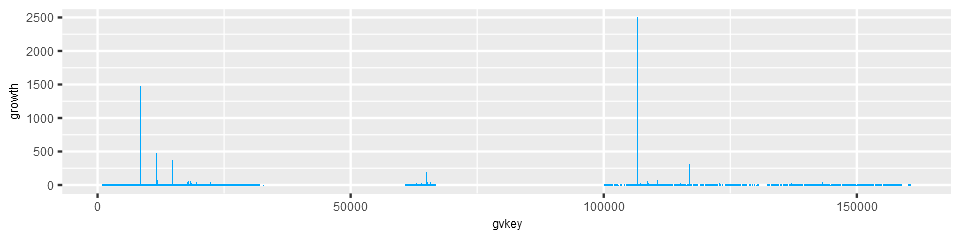

In [12]:
ggplot(data) +
geom_col(aes(x=gvkey, y=growth))

**Construct and evaluate a model based on the training & testing data.**

In [13]:
model.baseline = lm(growth ~ prccq.q1 + prccq.q2 + prccq.q3 + prccq.q4, data=data)
model.baseline


Call:
lm(formula = growth ~ prccq.q1 + prccq.q2 + prccq.q3 + prccq.q4, 
    data = data)

Coefficients:
(Intercept)     prccq.q1     prccq.q2     prccq.q3     prccq.q4  
   2.812364     0.009322    -0.009107    -0.002708           NA  


In [14]:
predict.baseline.insample = predict(model.baseline, newdata=data, type="response")
rmse = sqrt(mean((predict.baseline.insample - data$growth)^2))
data.frame(rmse)

rmse    
1 45.08651

<br>

**Use the model to make predictions about the validation data.** 

In [15]:
predict.baseline.val = predict(model.baseline, newdata=data.val, type="response")

<br>

**Use the predictions to inform your investment decisions and make a recommendation.**

Represent your recommendation as a data frame comprising `tic` and `invest` columns.

In [16]:
good_investment = predict.baseline.val > 0
good_count = length(which(good_investment))
invest = rep(0, nrow(data.val))
invest[good_investment] = budget / good_count
recommendation = data.frame(tic=data.val$tic, invest) 

data.frame(budget, total_invest=sum(recommendation$invest))
head(recommendation)

budget  total_invest
1 1000000 1000000

tic   invest  
1 3WIZD 1002.004
2 AACTF 1002.004
3 AAINF 1002.004
4 AAT   1002.004
5 ABAC  1002.004
6 ABB   1002.004

<br>

**Record your recommendation.**

In [17]:
write.csv(recommendation, "Team X Recommendation.csv", row.names=FALSE)

<br>

## Your Model & Business Value Formula
___

**Explore & further prepare data.**

In [79]:
data.test = data.2016[,c("gvkey","tic","conm","epsf12.q1","epsf12.q2","epsf12.q3","epsf12.q4","prccq.q1","prccq.q2","prccq.q3","prccq.q4")]

data.test$epsavg = rowMeans(data.test[,4:7])
data.test$priceavg= rowMeans(data.test[,8:11])
data.test$PtoE = data.test$priceavg/data.test$epsavg
data.test$grate1 = round((data.test$epsf12.q2 - data.test$epsf12.q1)/data.test$epsf12.q1,3)
data.test$grate2 = round((data.test$epsf12.q3 - data.test$epsf12.q2)/data.test$epsf12.q2,3)
data.test$grate3 = round((data.test$epsf12.q4 - data.test$epsf12.q3)/data.test$epsf12.q3,3)

row.has.na = apply(data.test, 1, function(x){any(is.na(x))})
data.testro = data.test[!row.has.na,]

data.testro$grateavg = round((rowMeans(data.testro[,15:16])),3)
data.testro$PEG = (data.testro$PtoE/data.testro$grateavg)/100

data.testro[1:100,]




gvkey  tic   conm                         epsf12.q1 epsf12.q2 epsf12.q3
4262  62527 3AMFC AMB FINANCIAL CORP              1.42      1.4600    1.5100
4638  65924 3CSBB CSB BANCORP INC/OH              2.25      2.2900    2.3300
2726  21521 3CZFS CITIZENS FINANCIAL SVCS INC     3.80      3.6127    3.6221
689  119436 3FBPI FIRST BANCORP INDIANA INC       1.10      1.1100    1.0700
4144  61225 3FETM FENTURA FINANCIAL INC           1.91      1.8400    1.9600
2149  18301 3FKYS FIRST KEYSTONE CORP             1.59      1.5900    1.5300
471  111459 3FNHM FNBH BANCORP INC                0.15      0.2200    0.2200
4523  65016 3GTHP GUIDED THERAPEUTICS INC      -137.11   -134.1400 -132.0400
248  106846 3HLFN HOME LOAN FINANCIAL CORP        2.29      2.3000    2.2500
3799  31385 3JUVF JUNIATA VALLEY FINANCIAL CP     0.77      0.7600    0.8200
3642  29513 3KSBI KS BANCORP INC                  1.17      1.3200    1.4600
311  107629 3NODB NORTH DALLAS BANK & TRUST CO    2.55      2.6300    2.6600
314  107644 3NWIN NORTHWEST IND BANCORP           2.86      2.9500    3.0900
925  128039 3PSBQ PSB HOLDINGS INC/WI             4.98      5.1500    5.1300
697  119617 7687B APOLLO MEDICAL HLDG INC-OLD    -1.79     -1.4500   -1.5700
885  126554 A     AGILENT TECHNOLOGIES INC        1.41      1.4100    1.4400
2837  22266 AAAP  ADVANCED ACCELERATR APP -ADR   -0.40     -0.3600   -0.4900
4263  62545 AABVF ABERDEEN INTERNATIONAL INC     -0.10      0.0200    0.1100
85     1045 AAL   AMERICAN AIRLINES GROUP INC    11.13     10.3800    9.2900
1901  16720 AAMC  ALTISOURCE ASSET MGMT CORP     -5.27     -6.2600   -6.0100
1891  16671 AAME  ATLANTIC AMERICAN CORP          0.20      0.0600    0.0500
306    1076 AAN   AARON'S INC                     1.87      1.8300    1.9100
2201  18564 AAOI  APPLIED OPTOELECTRONICS INC     0.61      0.2700    1.1000
2732  21542 AAON  AAON INC                        0.90      0.9700    1.0200
1416 145977 AAP   ADVANCE AUTO PARTS INC          6.54      6.1900    6.1000
2934  23175 AAPCF ATLANTIC ALLIANCE PARTNERSHP   -0.16     -0.4800   -0.8100
1926   1690 AAPL  APPLE INC                       9.00      8.5800    8.3100
3792  31232 AASP  ALL AMERICAN SPORTPARK INC     -0.16     -0.1700   -0.1500
2854  22570 AAU   ALMADEN MINERALS LTD            0.00     -0.0100   -0.0400
3445  27265 AAV   ADVANTAGE OIL & GAS LTD         0.18      0.0300    0.0300
4135  61155 AAWW  ATLAS AIR WORLDWIDE HLDG INC   -0.89     -2.2800   -2.0200
1348 143912 AAXN  AXON ENTERPRISE INC             0.29      0.2500    0.2900
1414  14592 AB    ALLIANCEBERNSTEIN HOLDING LP    1.96      1.8900    1.9900
2068   1790 AB.H  ASBESTOS CORP LTD              -0.80     -0.6800    1.0500
3163  24888 ABAX  ABAXIS INC                      1.36      1.3500    1.5200
1838  16101 ABBV  ABBVIE INC                      3.32      3.4700    3.7000
3821  31673 ABC   AMERISOURCEBERGEN CORP          6.58      7.2500    6.3200
3710  30222 ABCB  AMERIS BANCORP                  1.32      1.8600    1.9900
102  105248 ABCFF ABACUS MINING & EXPL CORP      -0.02     -0.0200   -0.0300
1390 145042 ABCO  ADVISORY BOARD CO              -2.06     -2.0600   -1.1600
3041  24010 ABCP  AMBASE CORP                    -0.12     -0.1100   -0.0900
2581  20550 ABDC  ALCENTRA CAPITAL CORP           0.88      0.5100    0.1400
902   12713 ABEO  ABEONA THERAPEUTICS INC        -0.59     -0.6300   -0.5200
1380 144640 ABG   ASBURY AUTOMOTIVE GROUP INC     6.40      6.5200    6.0200
3414  26754 ABIL  ABILITY INC                     0.34     -0.0400   -0.1900
1229   1410 ABM   ABM INDUSTRIES INC              0.93      0.7700    1.3300
2685  21136 ABMC  AMERICAN BIO MEDICA CORP       -0.01     -0.0100   -0.0200
1071  13619 ABMD  ABIOMED INC                     0.85      0.9300    0.9600
1795 160173 ABR   ARBOR REALTY TRUST INC          0.63      0.6200    0.5300
2571  20525 ABSSF AIRBOSS OF AMERICA CORP         0.82      0.9600    0.9200
325    1078 ABT   ABBOTT LABORATORIES             1.41      1.2900    0.6600
3

<br>

**Construct and evaluate a model based on the training & testing data.**

<br>

**Use the model to make predictions about the validation data.** 

<br>

**Use the predictions to inform your investment decisions and make a recommendation.**

Represent your recommendation as a data frame comprising `tic` and `invest` columns.

<br>

**Record your recommendation.**

In [ ]:
write.csv(recommendation, "Team X Recommendation.csv", row.names=FALSE) # Replace X with your team number

<br>

## Reflection
___
_Reflect on what your learned from this project here. (250 to 1000+ words)_

$\tiny \text{Copyright (c) Berkeley Data Analytics Group, LLC}$